Import Libraries

In [35]:
# Data handling
import pandas as pd
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter magic (ONLY in Jupyter)
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Advanced models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


Load Data

In [184]:
df = pd.read_csv("Downloads/Housing.csv")

Basic Data Inspection

In [169]:
# getting some info about the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [173]:
# printfirst 5 rows of the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
# print last 5 rows of the dataset
housing_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [49]:
# number of rows and columns in the dataset
housing_data.shape

(545, 13)

In [51]:
# checking for missing values
housing_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Show Column Names

In [175]:
# Show all column names
print(housing_data.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


Exploratory Data Analysis (EDA)

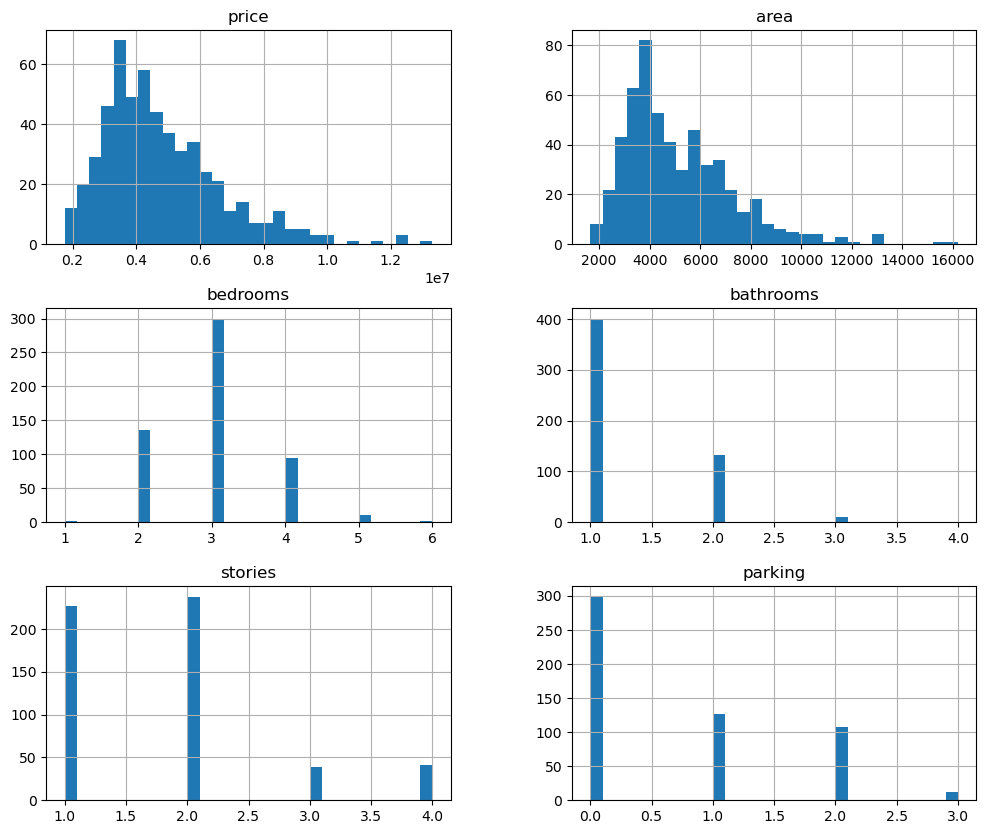

In [198]:
housing_data.hist(figsize=(12,10), bins=30)
plt.show()

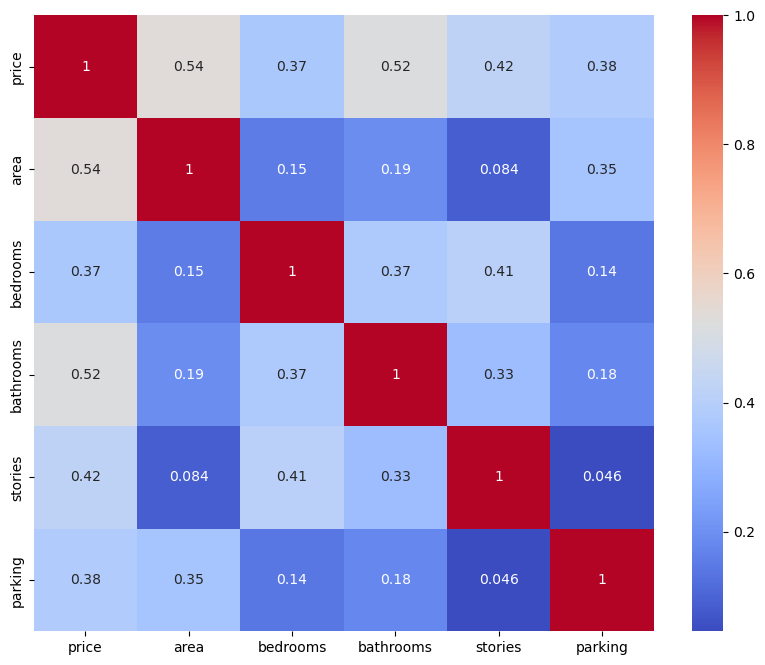

In [61]:
plt.figure(figsize=(10,8))
numeric_cols = housing_data.select_dtypes(include='number')  # select only numeric columns
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

Scatter Plot & Boxplot

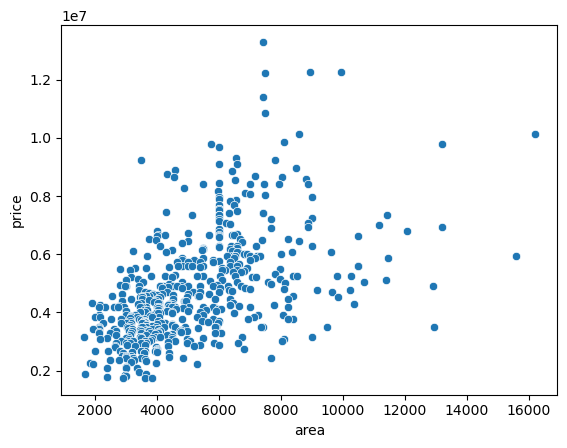

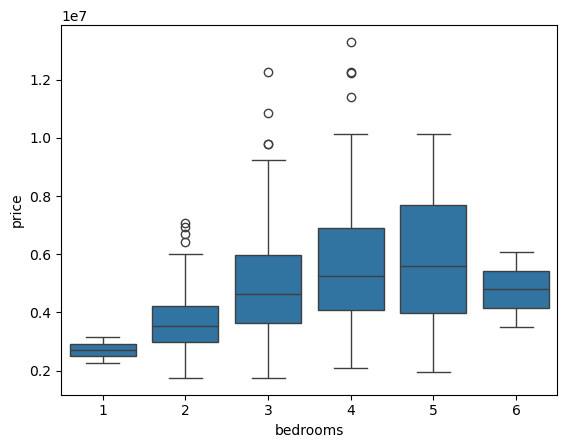

In [62]:
# Scatter plot
sns.scatterplot(data=housing_data, x='area', y='price')
plt.show()

# Boxplot
sns.boxplot(data=housing_data, x='bedrooms', y='price')
plt.show()


Convert Categorical Data

In [180]:
housing_data = pd.get_dummies(housing_data, drop_first=True)

Split Features & Target

In [188]:
X = housing_data.drop('price', axis=1)
y = housing_data['price']

Train-Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train Models

In [58]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_estimators=200,
        learning_rate=0.05
    ),
    "LightGBM": LGBMRegressor(random_state=42)
}

Model Evaluation

In [212]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    results[name] = score

results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 13
[LightGBM] [Info] Start training from score 4706527.385321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

{'LinearRegression': 0.6529242642153182,
 'RandomForest': 0.611918531405699,
 'GradientBoosting': 0.66596489068611,
 'XGBoost': 0.6037764549255371,
 'LightGBM': 0.6081498995700332}